In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('apple_sales.csv', index_col=False)

In [3]:
df['store_id'].unique()

array([1, 2, 3], dtype=int64)

In [4]:
## Clean Dates
for dates in df['pub_date']:
    cleaned_date = dates.split()
    cleaned_date = cleaned_date[0][:-3]
    df['pub_date']=df['pub_date'].replace(dates, cleaned_date)

### Plots

#### Store Sales Function

In [26]:
#Function to get a sotre's iphone revenue
def store_sales(store_id):
    sns.set_style("darkgrid")

    df_12 = (df[(df['store_id'] == store_id)&(df['prod_id'] == 12)])

    df_13 = (df[(df['store_id'] == store_id)&(df['prod_id'] == 13)])

    df_14 = (df[(df['store_id'] == store_id)&(df['prod_id'] == 14)])


    plt.plot(df_13['pub_date'], df_13['units_sold'], marker = 'x')

    plt.plot(df_12['pub_date'], df_12['units_sold'], marker = 'o')

    plt.plot(df_14['pub_date'], df_14['units_sold'], marker = 'o')


    plt.ylabel('Units Sold')
    plt.xlabel('Dates')
    plt.xticks(rotation = 45)

    plt.title(f'Store {store_id} Sales')
    plt.legend(['iPhone13', 'iPhone12', 'iPhone14'])
    plt.show()

#### View Store Sales

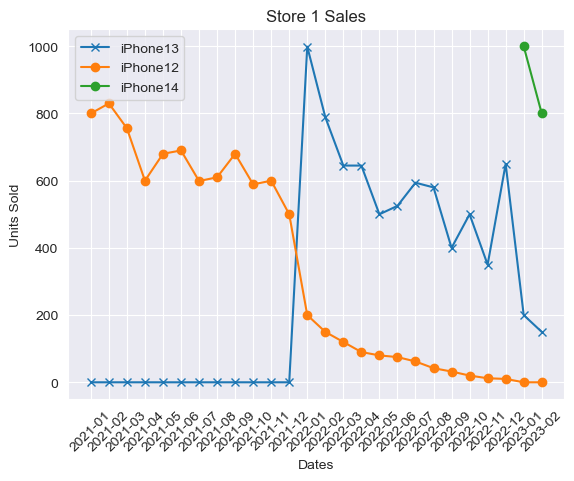

In [27]:
store_sales(1)

We can see that Store 1 had the most Sales on the 12th of 2021 with 1200 units of iphone 13 sold as well as iphone 14

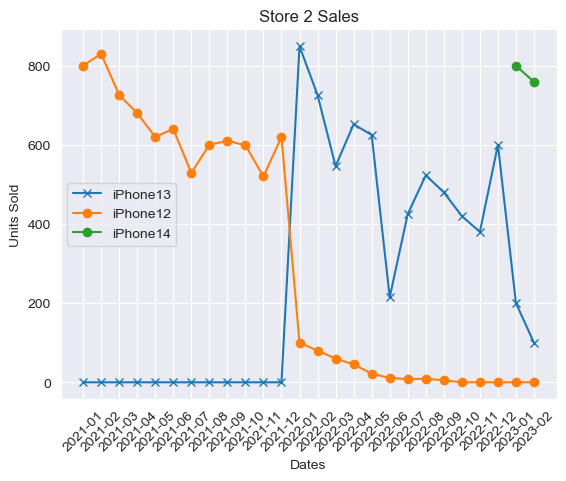

In [28]:
store_sales(2)

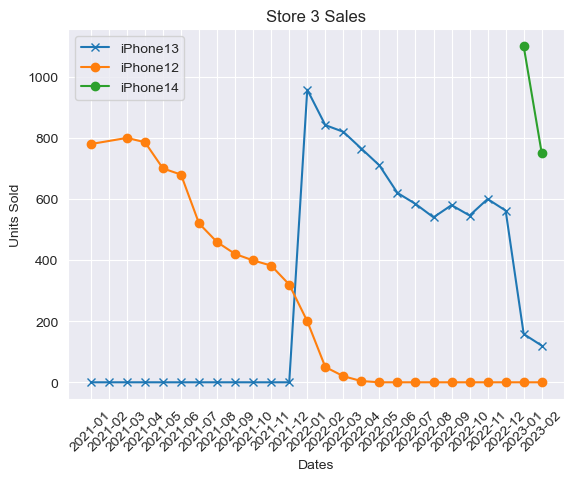

In [29]:
store_sales(3)

We can see that Store 3 had the most Sales on the 12th of 2021 and lowest sales on the 1st 2023. We can assume that the highest sales is due to Christmas and the lowest sales is when the new iPhone 14 came out.

#### All Store sales

In [30]:
df_date = df.groupby('pub_date').sum()
df_date.reset_index(inplace=True)

In [31]:
df_store_sales= df.groupby(['pub_date', 'store_id']).sum()
df_store_sales.reset_index(inplace=True)

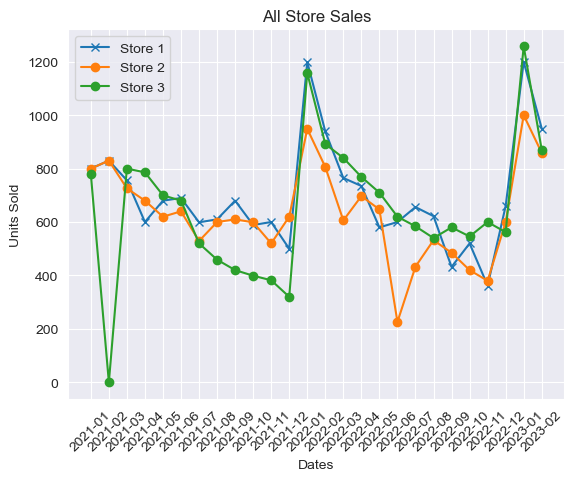

In [11]:
sns.set_style("darkgrid")


plt.plot(df_store_sales[df_store_sales['store_id']==1].pub_date, df_store_sales[df_store_sales['store_id']==1].units_sold, marker = 'x')

plt.plot(df_store_sales[df_store_sales['store_id']==2].pub_date, df_store_sales[df_store_sales['store_id']==2].units_sold, marker = 'o')

plt.plot(df_store_sales[df_store_sales['store_id']==3].pub_date, df_store_sales[df_store_sales['store_id']==3].units_sold, marker = 'o')


plt.ylabel('Units Sold')
plt.xlabel('Dates')

plt.xticks(rotation = 45)
plt.legend(['Store 1', 'Store 2', 'Store 3'])
plt.title('All Store Sales')
plt.show()

We can see that Store 1 had the most Sales on the 12th of 2021 with 1200 units sold.
We can also observe that on thr 1st of 2021 store 3 had 0 units sold.

#### All Apple sales

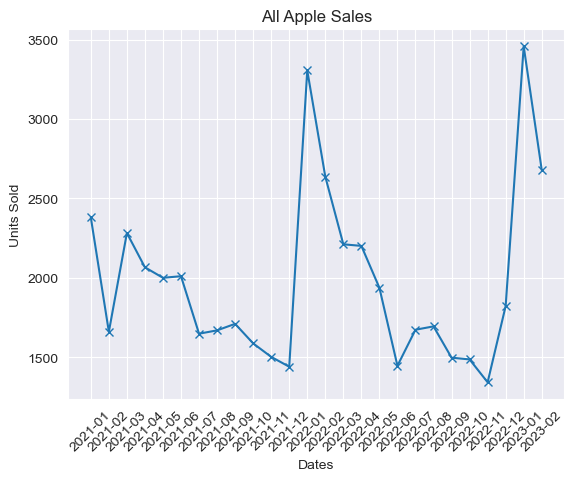

In [12]:
sns.set_style("darkgrid")

plt.plot(df_date['pub_date'], df_date['units_sold'], marker = 'x')

plt.ylabel('Units Sold')
plt.xlabel('Dates')

plt.xticks(rotation = 45)

plt.title('All Apple Sales')
plt.show()

### Calc

#### Sum of units sold per store

In [13]:
def units_sold_per_store(store_id, prod_id):
    
    iphone_14 = 1499
    iphone_13 = 1199
    iphone_12 = 999
    
    store_sum = df[(df['store_id'] == store_id)&(df['prod_id'] == prod_id)]
    if prod_id == 14:
        store_sum = store_sum.groupby('pub_date').sum()*iphone_14
        store_sum.reset_index(inplace=True)
        return store_sum
        
    elif prod_id == 13:
        store_sum = store_sum.groupby('pub_date').sum()*iphone_13
        store_sum.reset_index(inplace=True)
        return store_sum

    else:
        store_sum = store_sum.groupby('pub_date').sum()*iphone_12
        store_sum.reset_index(inplace=True)
        return store_sum

In [14]:
def return_store(store_id, prod_id):
    if isinstance(prod_id, int):
        return units_sold_per_store(store_id, prod_id)
    
    if isinstance(prod_id, list):
        for items in prod_id:
            store = units_sold_per_store(store_id, items)
#             print(f'{tabulate(store, headers="keys", tablefmt="psql")}\n')
            return store

In [15]:
sum_dict={
    'store_1' : {'iphone_14': 0, 'iphone_13':0, 'iphone_12':0},
    'store_2' : {'iphone_14': 0, 'iphone_13':0, 'iphone_12':0},
    'store_3' : {'iphone_14': 0, 'iphone_13':0, 'iphone_12':0},
}

In [16]:
def store_sale_sum(stores, product_id):
    print('Total sum of product per store: \n')
    for i in stores:
        summ = return_store(i,product_id).units_sold.sum()
        sum_dict[f'store_{i}'][f'iphone_{product_id}'] = summ
    return sum_dict

In [17]:
store_sale_sum([1,2,3], 14)

Total sum of product per store: 



{'store_1': {'iphone_14': 2698200, 'iphone_13': 0, 'iphone_12': 0},
 'store_2': {'iphone_14': 2336941, 'iphone_13': 0, 'iphone_12': 0},
 'store_3': {'iphone_14': 2773150, 'iphone_13': 0, 'iphone_12': 0}}

In [18]:
store_sale_sum([1,2,3], 13)

Total sum of product per store: 



{'store_1': {'iphone_14': 2698200, 'iphone_13': 9024873, 'iphone_12': 0},
 'store_2': {'iphone_14': 2336941, 'iphone_13': 8082459, 'iphone_12': 0},
 'store_3': {'iphone_14': 2773150, 'iphone_13': 10077595, 'iphone_12': 0}}

In [19]:
store_sale_sum([1,2,3], 12)

Total sum of product per store: 



{'store_1': {'iphone_14': 2698200, 'iphone_13': 9024873, 'iphone_12': 8818173},
 'store_2': {'iphone_14': 2336941, 'iphone_13': 8082459, 'iphone_12': 8105886},
 'store_3': {'iphone_14': 2773150,
  'iphone_13': 10077595,
  'iphone_12': 6513480}}

#### total_sales

In [20]:
total_sales = pd.DataFrame([[k1, k2, v]
              for k1,d in sum_dict.items() 
              for k2,v in d.items()],
             columns=['store', 'iphone', 'price'])

In [21]:
total_sales

,store,iphone,price
0,store_1,iphone_14,2698200
1,store_1,iphone_13,9024873
2,store_1,iphone_12,8818173
3,store_2,iphone_14,2336941
4,store_2,iphone_13,8082459
5,store_2,iphone_12,8105886
6,store_3,iphone_14,2773150
7,store_3,iphone_13,10077595
8,store_3,iphone_12,6513480


In [22]:
print(f"Total iPhone 14 sales £{total_sales[total_sales['iphone']== 'iphone_14'].max().price} \n")

print("Total iPhone14 sales in each store: ")
total_sales[total_sales['iphone']== 'iphone_14']

Total iPhone 14 sales £2773150 

Total iPhone14 sales in each store: 


,store,iphone,price
0,store_1,iphone_14,2698200
3,store_2,iphone_14,2336941
6,store_3,iphone_14,2773150


In [23]:
print(f"Total iPhone 13 sales £{total_sales[total_sales['iphone']== 'iphone_13'].max().price} \n")

print("Total iPhone13 sales in each store: ")
total_sales[total_sales['iphone']== 'iphone_13']

Total iPhone 13 sales £10077595 

Total iPhone13 sales in each store: 


,store,iphone,price
1,store_1,iphone_13,9024873
4,store_2,iphone_13,8082459
7,store_3,iphone_13,10077595


In [24]:
print(f"Total iPhone 12 sales £{total_sales[total_sales['iphone']== 'iphone_12'].max().price} \n")

print("Total iPhone12 sales in each store: ")
total_sales[total_sales['iphone'] == 'iphone_12']

Total iPhone 12 sales £8818173 

Total iPhone12 sales in each store: 


,store,iphone,price
2,store_1,iphone_12,8818173
5,store_2,iphone_12,8105886
8,store_3,iphone_12,6513480
